Reading CIFAR-10...
Loading weights...
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step


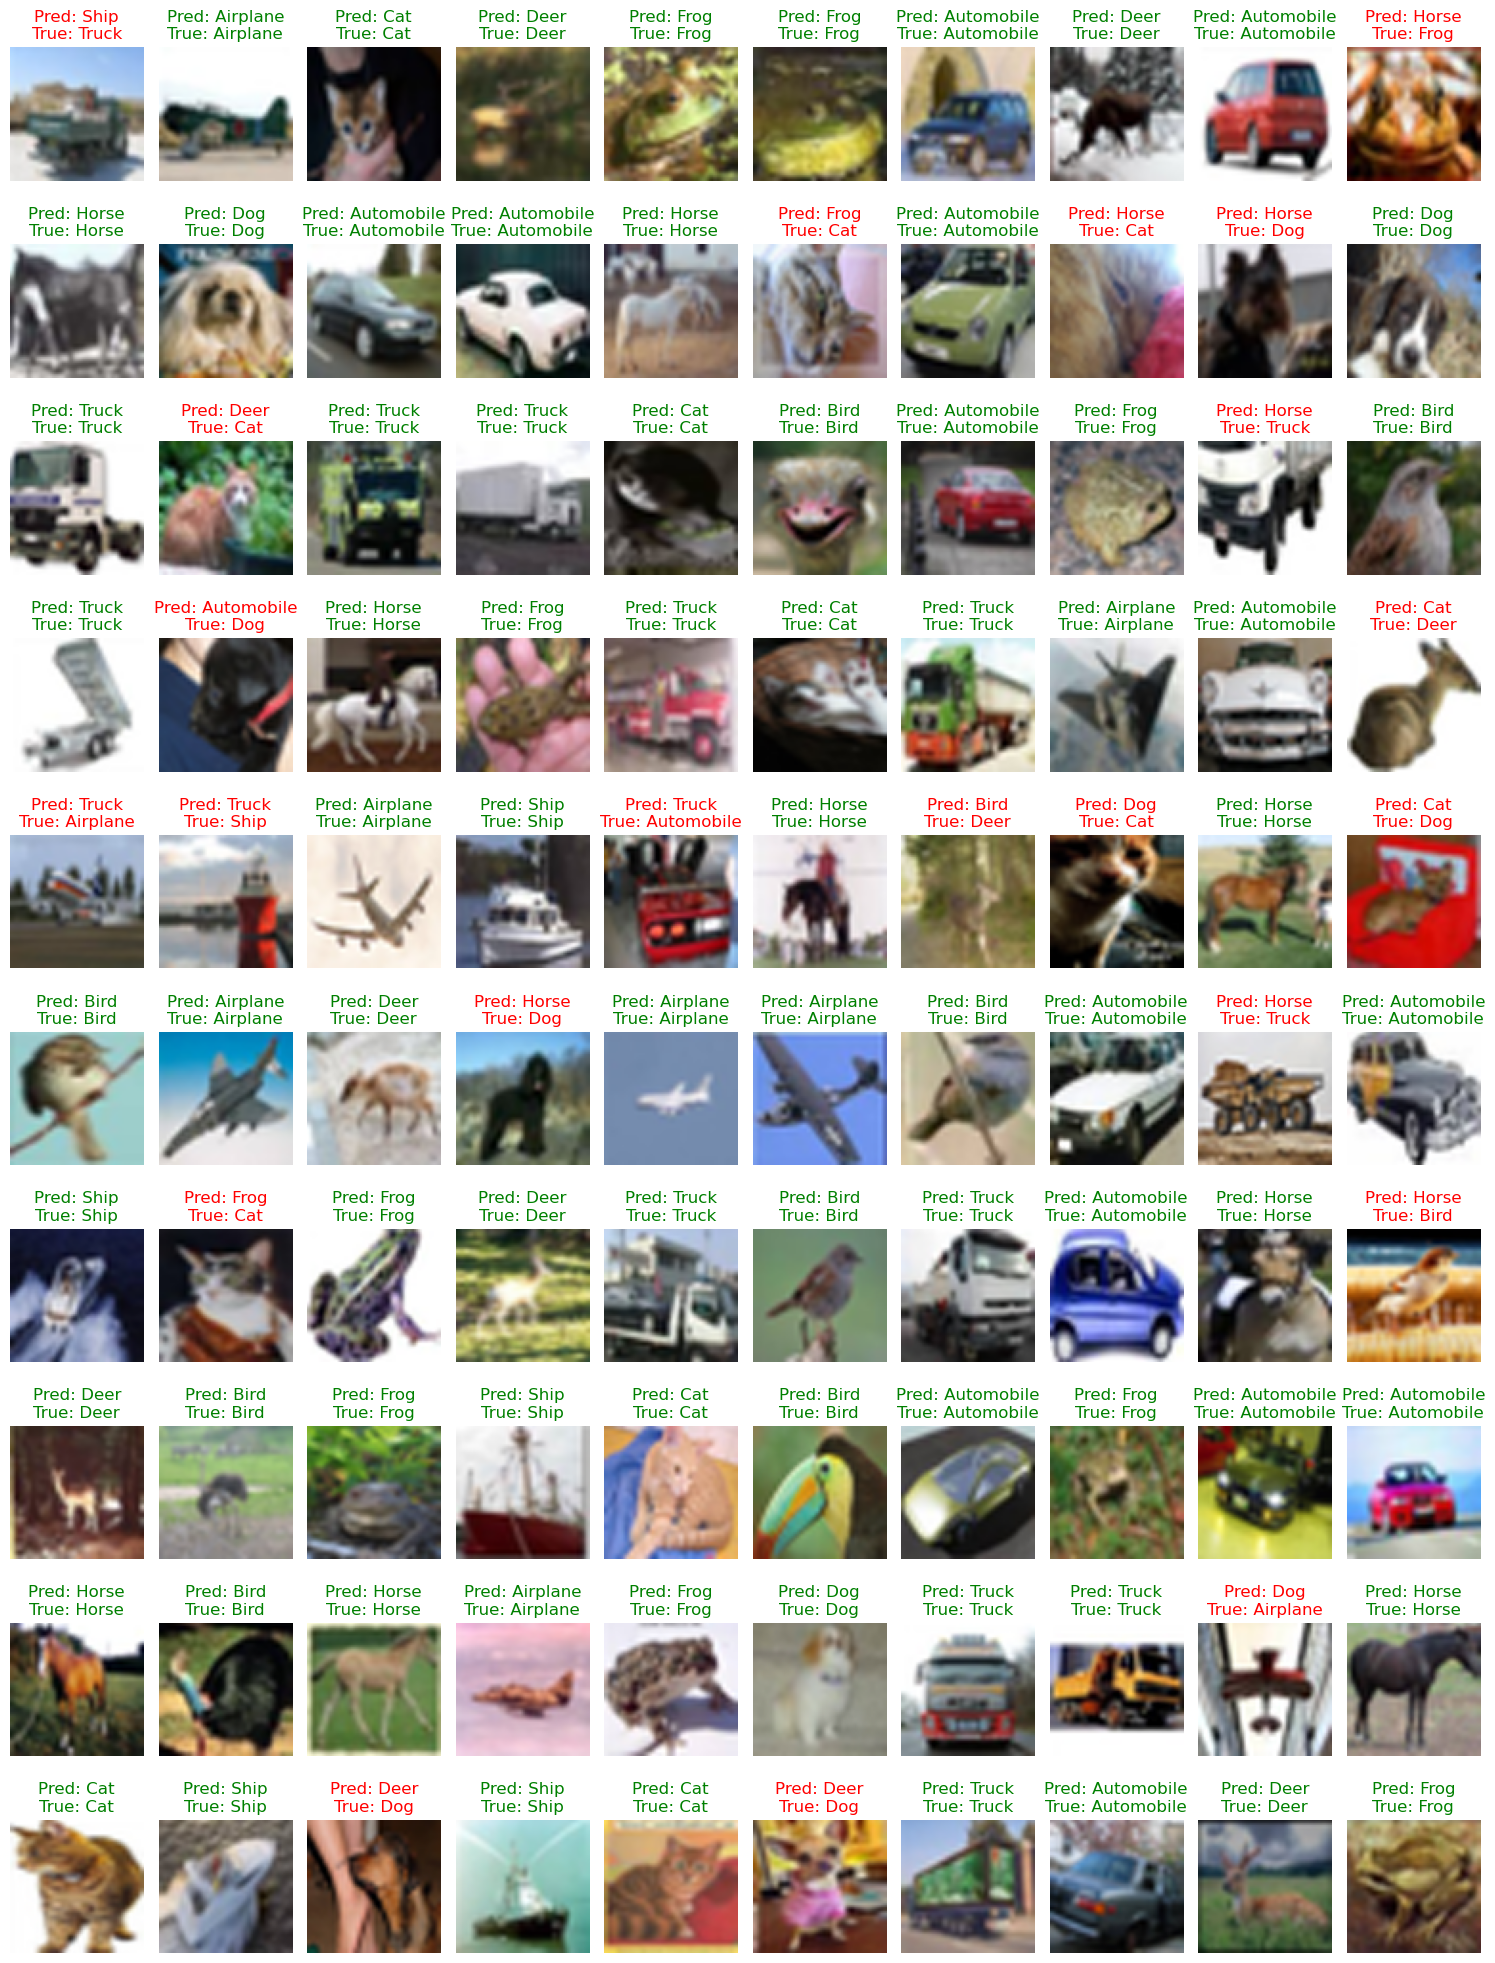

Evaluating dataset...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.9568 - loss: 0.1288
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8252 - loss: 0.5620
Train Accuracy = 0.957
Test Accuracy = 0.827


In [33]:
# -*- coding: utf-8 -*-

import tensorflow as tf
from tensorflow.keras import layers, models
from alexnet import AlexNet
from dataset_helper import read_cifar_10

INPUT_WIDTH = 70
INPUT_HEIGHT = 70
INPUT_CHANNELS = 3

NUM_CLASSES = 10

LEARNING_RATE = 0.001   # Original value: 0.01
MOMENTUM = 0.9
KEEP_PROB = 0.5

EPOCHS = 100
BATCH_SIZE = 128

print('Reading CIFAR-10...')
X_train, Y_train, X_test, Y_test = read_cifar_10(image_width=INPUT_WIDTH, image_height=INPUT_HEIGHT)

# # Convert the input data to float32 and normalize to the range [0, 1]
# X_train = X_train.astype('float32') / 255.0
# X_test = X_test.astype('float32') / 255.0


# Create the AlexNet model
alexnet = AlexNet(input_width=INPUT_WIDTH, input_height=INPUT_HEIGHT, input_channels=INPUT_CHANNELS,
                  num_classes=NUM_CLASSES, learning_rate=LEARNING_RATE, momentum=MOMENTUM, keep_prob=KEEP_PROB)

# Compile the model
alexnet.compile_model()

# Load the pre-trained weights
print('Loading weights...')
alexnet.load('./model/alexnet.keras')


import numpy as np
import matplotlib.pyplot as plt

# Define CIFAR-10 class names
CLASS_NAMES = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Select a few random images from the test set
num_images = 100  # Change to any number
indices = np.random.choice(len(X_test), num_images, replace=False)
selected_images = X_test[indices]
selected_labels = Y_test[indices]  # True labels

# Get model predictions
predictions = alexnet.model.predict(selected_images)
top1_preds = np.argmax(predictions, axis=1)  # Top-1 predicted class

# Dynamically determine the grid size
cols = 10  # Number of columns per row
rows = (num_images + cols - 1) // cols  # Calculate required rows

plt.figure(figsize=(15, rows * 2))  # Adjust figure size based on rows

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)  # Create a flexible grid
    plt.imshow(selected_images[i])
    plt.axis('off')
    plt.title(f"Pred: {CLASS_NAMES[top1_preds[i]]}\nTrue: {CLASS_NAMES[np.argmax(selected_labels[i])]}", 
              color='green' if top1_preds[i] == np.argmax(selected_labels[i]) else 'red')

plt.tight_layout()
plt.show()


# Evaluate dataset
print('Evaluating dataset...')
train_loss, train_accuracy = alexnet.evaluate(X_train, Y_train)
test_loss, test_accuracy = alexnet.evaluate(X_test, Y_test)

print('Train Accuracy = {:.3f}'.format(train_accuracy))
print('Test Accuracy = {:.3f}'.format(test_accuracy))
